# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [3]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [4]:
# frequency table for prestige and whether or not someone was admitted
df['prestige'][df.admit==1].value_counts()

2.0    53
1.0    33
3.0    28
4.0    12
Name: prestige, dtype: int64

## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [7]:
#We can create it manually
df['prestige_1'] = 0
df.loc[df.prestige == 1, 'prestige_1'] = 1

df['prestige_2'] = 0
df.loc[df.prestige == 2, 'prestige_2'] = 1

df['prestige_3'] = 0
df.loc[df.prestige == 3, 'prestige_3'] = 1

df['prestige_4'] = 0
df.loc[df.prestige == 4, 'prestige_4'] = 1

print df.columns
print df.info()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Index([u'admit', u'gre', u'gpa', u'prestige', u'prestige_1', u'prestige_2',
       u'prestige_3', u'prestige_4'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 8 columns):
admit         397 non-null int64
gre           397 non-null float64
gpa           397 non-null float64
prestige      397 non-null float64
prestige_1    397 non-null int64
prestige_2    397 non-null int64
prestige_3    397 non-null int64
prestige_4    397 non-null int64
dtypes: float64(3), int64(5)
memory usage: 27.9 KB
None


In [17]:
#Or we can use pandas
dummy_ranks = pd.get_dummies(df['prestige'],prefix='prestige')

#### Question 2.2. When modeling our class variables, how many do we need?

Answer: 4 dummy variables because there were 4 distinct prestige categories.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [63]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         1.0         0.0         0.0         0.0
1      1  660.0  3.67         0.0         1.0         0.0         0.0
2      1  800.0  4.00         0.0         0.0         1.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         1.0         0.0         0.0         0.0


In [11]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(df.admit,df.prestige_1)

prestige_1,0,1
admit,,
0,243,28
1,93,33


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [12]:
#result1:result2
odds_p1 = 33/28.
print odds_p1

1.17857142857


#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [13]:
odds_not_p1 = 93/243.
print odds_not_p1

0.382716049383


#### Question 3.3. Calculate the odds ratio.

In [14]:
OR_p1 = odds_p1/odds_not_p1
print OR_p1

3.07949308756


#### Question 3.4. Write this finding in a sentenance:

Answer: The odds of being admitted to grad school attending #1 ranked college is 3 times that of not attending #1 ranked college.

#### Question 3.5. Print the cross tab for prestige_4.

In [15]:
pd.crosstab(df.admit, df.prestige_4, margins=True)

prestige_4,0,1,All
admit,,,
0,216,55,271
1,114,12,126
All,330,67,397


#### Question 3.6. Calculate the OR.

In [16]:
odds_p4 = 12/55.
odds_not_p4 = 114/216.
OR_p4 = odds_p4/odds_not_p4
print OR_p4

0.413397129187


#### Question 3.7. Write this finding in a sentence.

Answer: The odds of being admitted to grad school if attending #4 ranked college is 0.41 times (or 59% less) that of not attending #4 ranked college.

## Part 4. Analysis

In [19]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [20]:
# manually add the intercept
data['intercept'] = 1.0

#### Question 4.1. Set the covariates to a variable called train_cols.

In [22]:
train_cols = data.columns[1:]
train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')

#### Question 4.2. Fit the model.

In [23]:
logit_model = sm.Logit(data['admit'],data[train_cols])
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### Question 4.3. Print the summary results.

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 24 Mar 2016   Pseudo R-squ.:                 0.08166
Time:                        19:35:32   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

In [30]:
result.params

gre             0.002218
gpa             0.779337
prestige_2.0   -0.680137
prestige_3.0   -1.338677
prestige_4.0   -1.553411
intercept      -3.876854
dtype: float64

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [31]:
np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

In [37]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### Question 4.5. Interpret the OR of Prestige_2.

Answer: The odds of admission to grad school decreases by 50% if attended prestige #2 school vs prestige #1 school.

#### Question 4.6. Interpret the OR of GPA.

Answer: With one unit increase in GPA, the odds of admission increases by 0.2%.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [47]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [75]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### Question 5.1. Recreate the dummy variables.

In [76]:
# recreate the dummy variables
# keep only what we need for making predictions
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

#### Question 5.2. Make predictions on the enumerated dataset.

In [77]:
train_cols = combos.columns[1:]
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.tail(4)

       gre  gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
396  800.0  4.0       1.0        1.0         0.0         0.0         0.0   
397  800.0  4.0       2.0        1.0         1.0         0.0         0.0   
398  800.0  4.0       3.0        1.0         0.0         1.0         0.0   
399  800.0  4.0       4.0        1.0         0.0         0.0         1.0   

     admit_pred  
396    0.526992  
397    0.389060  
398    0.528304  
399    0.192979  


#### Question 5.3. Interpret findings for the last 4 observations.

Answer: Probability of admission ranges from 19% to 53%.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


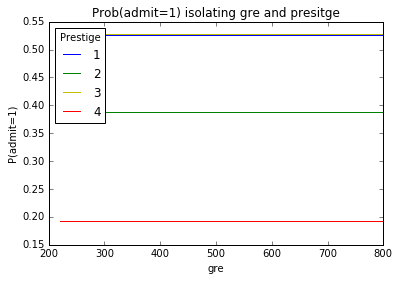

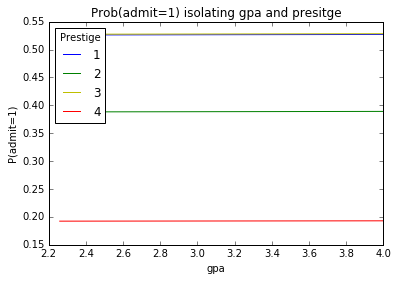

In [78]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')